## Final Project Submission

Please fill out:
* Student name: Dean Stallons
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


1.) I will first import all of the libraries needed and the CSV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
orig_df = pd.read_csv('kc_house_data.csv')
orig_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


2.) Next I will check for the general information of the columns, total number of null values, and create a function to display unique values and their counts in each column. I'll be performing the latter to see if there are any indicators of categorical data as well as characters that aren't null but placeholders for no value.

In [3]:
orig_df.info()
orig_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
def unique(value):
    for i in value.columns:
        print('Values for {}:\n{}\n\n'.format(i, value[i].value_counts()))
unique(orig_df)

Values for id:
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
5282200015    2
2787460720    2
5536100020    2
2568300045    2
8648900110    2
8910500150    2
2044500213    2
4222310010    2
8651402750    2
8820903380    2
4345000510    2
641900050     2
1823049202    2
8121100395    2
6308000010    2
1139600270    2
937000330     2
3293700496    2
4435000705    2
5430300171    2
             ..
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
2770603522    1
2738640470    1
9238480020    1
9492500170    1
2607740100    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
1931300035    1
1922000070    1
8165500110    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id,

3.) Going to drop columns with over 40% of the data equaling 0, NaN, or ? values.

In [9]:
after_drop_df = orig_df.drop(['yr_renovated', 'sqft_basement', 'view', 'waterfront'], axis=1)
after_drop_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


4.) Now I want to search for any duplicate values using "id" as the primary key

In [10]:
duplicates = after_drop_df[after_drop_df.duplicated(subset='id')]
print(len(duplicates))
duplicates.head()

177


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,3,8,1290,1939,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,3,11,2690,1997,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,3,6,960,1922,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,3,6,1000,1943,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,5,7,1100,1954,98133,47.7711,-122.341,1810,6929


5.) And then drop all of the duplicates from the dataset.

In [11]:
after_dupe_remove_df = after_drop_df.drop_duplicates('id')
after_dupe_remove_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 17 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
yr_built         21420 non-null int64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.9+ MB


6.) Now that the duplicates are handled I will drop the ID column as it is no longer needed. Also, I will make the date column the index and convert the data type to float.

In [35]:
del drop_id_df
drop_id_df = after_dupe_remove_df.drop('id', axis=1)
drop_id_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [39]:
import datetime as dt
#drop_id_df['date'] = drop_id_df['date'].map(str())
drop_id_df['date'] = pd.to_datetime(drop_id_df['date'], format="%m/%d/%Y")
drop_id_df['date'] = drop_id_df['date'].map(dt.datetime.toordinal)
#drop_id_df.date.value_counts()

In [47]:
#del date_index_df
date_index_df = drop_id_df.set_index('date', append=False)
date_index_df.groupby(['date'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,
735519,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
735576,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
735654,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
735576,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
735647,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [49]:
date_index_df.sort_values(by='date', ascending=False)
date_index_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 735519 to 735521
Data columns (total 15 columns):
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
yr_built         21420 non-null int64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(5), int64(10)
memory usage: 2.6 MB


7.) With the data cleaned and indexed, I will begin looking at which columns contain categorical data by viewing their scatter plots and histograms.

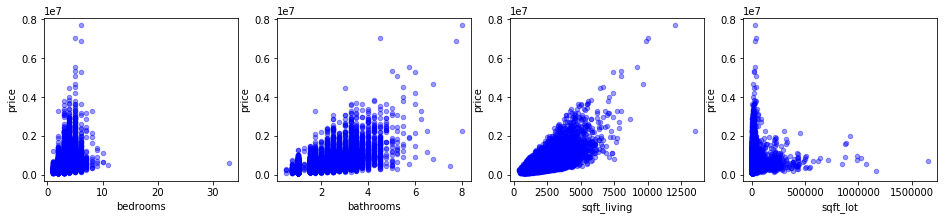

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 
                    'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 
                    'sqft_lot15'], axes):
    date_index_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

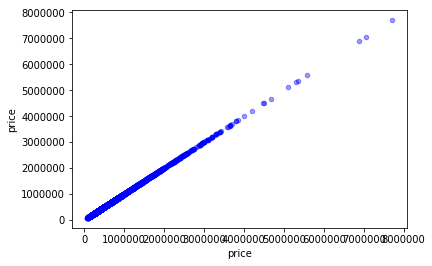

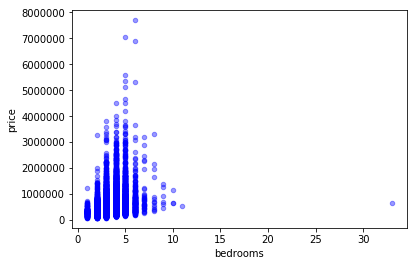

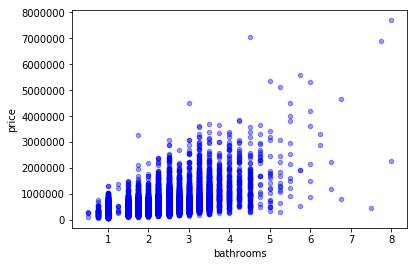

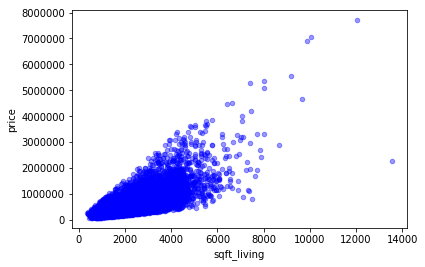

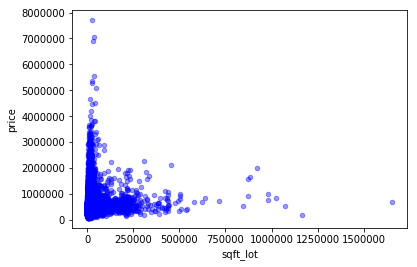

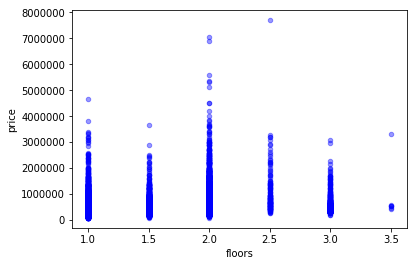

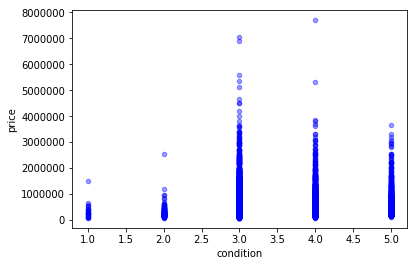

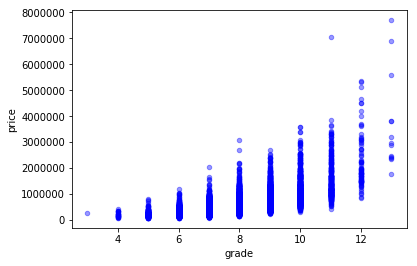

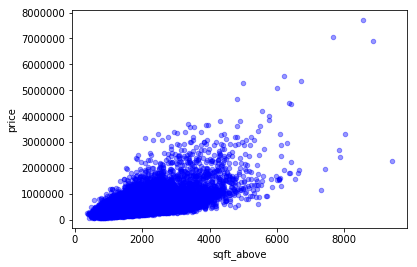

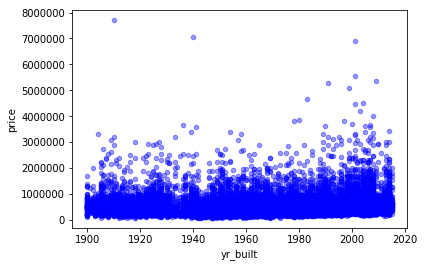

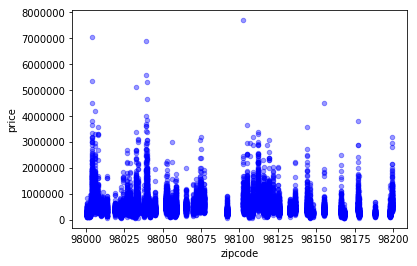

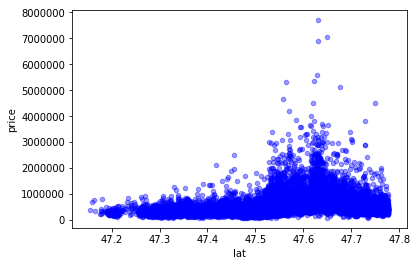

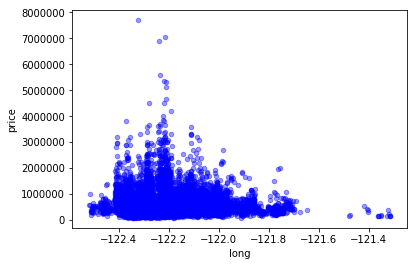

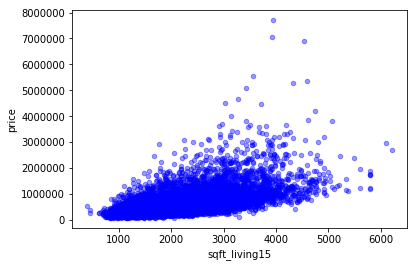

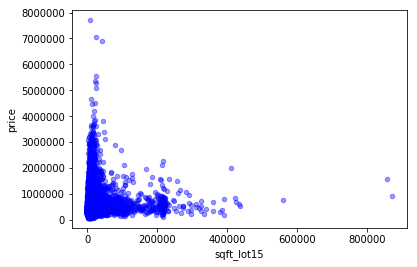

In [71]:
for col in date_index_df.columns:
    date_index_df.plot(kind='scatter', x=col, y='price', alpha=0.4, color='b')

8.) Based on the scatter plots I do not see a linear relationship with some additional columns which I will drop from my data frame.

In [72]:
drop2_df = date_index_df.drop(['sqft_lot', 'yr_built', 'lat', 'long', 'sqft_lot15'], axis=1)
drop2_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,zipcode,sqft_living15
date,,,,,,,,,,
735519,221900.0,3,1.00,1180,1.0,3,7,1180,98178,1340
735576,538000.0,3,2.25,2570,2.0,3,7,2170,98125,1690
735654,180000.0,2,1.00,770,1.0,3,6,770,98028,2720
735576,604000.0,4,3.00,1960,1.0,5,7,1050,98136,1360
735647,510000.0,3,2.00,1680,1.0,3,8,1680,98074,1800


In [74]:
drop2_df.drop(['floors'], axis=1, inplace=True)
drop2_df.head()

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_above,zipcode,sqft_living15
date,,,,,,,,,
735519,221900.0,3,1.00,1180,3,7,1180,98178,1340
735576,538000.0,3,2.25,2570,3,7,2170,98125,1690
735654,180000.0,2,1.00,770,3,6,770,98028,2720
735576,604000.0,4,3.00,1960,5,7,1050,98136,1360
735647,510000.0,3,2.00,1680,3,8,1680,98074,1800


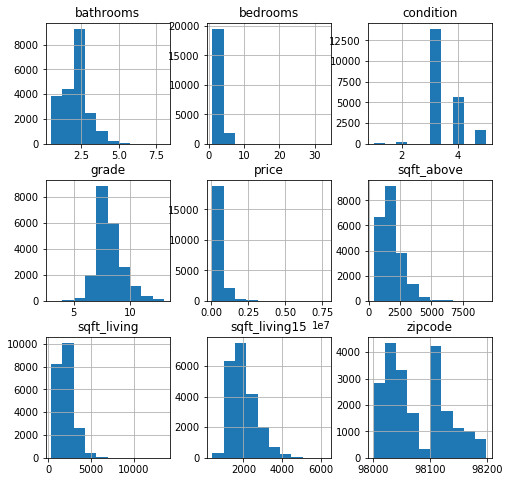

In [75]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
drop2_df.hist(ax = ax);

9.) The next part of my work will be categorizing data for zipcode.

In [78]:
zip_dummies = pd.get_dummies(drop2_df["zipcode"], prefix="zip")
drop3_df = drop2_df.drop(["zipcode"], axis=1)
cat_df = pd.concat([drop3_df, zip_dummies], axis=1)
cat_df.head()

,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_above,sqft_living15,zip_98001,zip_98002,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
date,,,,,,,,,,,,,,,,,,,,,
735519,221900.0,3,1.00,1180,3,7,1180,1340,0,0,...,0,0,0,0,0,0,1,0,0,0
735576,538000.0,3,2.25,2570,3,7,2170,1690,0,0,...,0,0,0,0,0,0,0,0,0,0
735654,180000.0,2,1.00,770,3,6,770,2720,0,0,...,0,0,0,0,0,0,0,0,0,0
735576,604000.0,4,3.00,1960,5,7,1050,1360,0,0,...,0,0,0,0,0,0,0,0,0,0
735647,510000.0,3,2.00,1680,3,8,1680,1800,0,0,...,0,0,0,0,0,0,0,0,0,0


10.) I am going to reset the date index and run a scatter of the relationship between it and price.

In [79]:
final_df=cat_df.reset_index()
final_df.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,grade,sqft_above,sqft_living15,zip_98001,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,735519,221900.0,3,1.00,1180,3,7,1180,1340,0,...,0,0,0,0,0,0,1,0,0,0
1,735576,538000.0,3,2.25,2570,3,7,2170,1690,0,...,0,0,0,0,0,0,0,0,0,0
2,735654,180000.0,2,1.00,770,3,6,770,2720,0,...,0,0,0,0,0,0,0,0,0,0
3,735576,604000.0,4,3.00,1960,5,7,1050,1360,0,...,0,0,0,0,0,0,0,0,0,0
4,735647,510000.0,3,2.00,1680,3,8,1680,1800,0,...,0,0,0,0,0,0,0,0,0,0


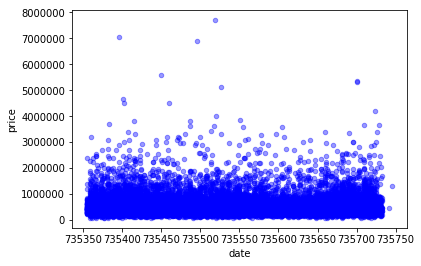

In [81]:
final_df.plot(kind='scatter', x='date', y='price', alpha=0.4, color='b')

There doesn't appear to be a linear relationship here so I will drop the date column.

In [82]:
data = final_df.drop(['date'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 78 columns):
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_living15    21420 non-null int64
zip_98001        21420 non-null uint8
zip_98002        21420 non-null uint8
zip_98003        21420 non-null uint8
zip_98004        21420 non-null uint8
zip_98005        21420 non-null uint8
zip_98006        21420 non-null uint8
zip_98007        21420 non-null uint8
zip_98008        21420 non-null uint8
zip_98010        21420 non-null uint8
zip_98011        21420 non-null uint8
zip_98014        21420 non-null uint8
zip_98019        21420 non-null uint8
zip_98022        21420 non-null uint8
zip_98023        21420 non-null uint8
zip_98024        21420 non-null uint8
zip_98027    

11.) Now I want to check for Multicollinearity by splitting out the non-target columns and then viewing the seaborn heat map.

In [86]:
data_pred= data.iloc[:,1:8]

In [87]:
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,condition,grade,sqft_above,sqft_living15
bedrooms,True,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False
sqft_living,False,True,True,False,True,True,True
condition,False,False,False,True,False,False,False
grade,False,False,True,False,True,True,False
sqft_above,False,False,True,False,True,True,False
sqft_living15,False,False,True,False,False,False,True


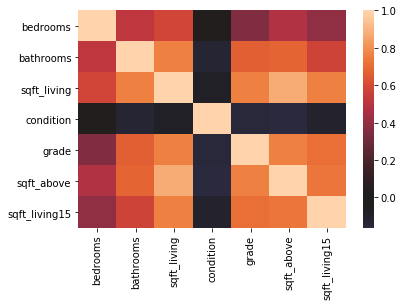

In [88]:
sns.heatmap(data_pred.corr(), center=0);

12.) I'm going to drop square foot living as this has a linear relationship with 4 other columns. I'm also going to remove as it has the same relationships as square foot above.

In [89]:
multi_df = data.drop(['sqft_living', 'grade'], axis=1)
multi_df.head()

,price,bedrooms,bathrooms,condition,sqft_above,sqft_living15,zip_98001,zip_98002,zip_98003,zip_98004,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,3,1180,1340,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,3,2170,1690,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,3,770,2720,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,5,1050,1360,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,3,1680,1800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


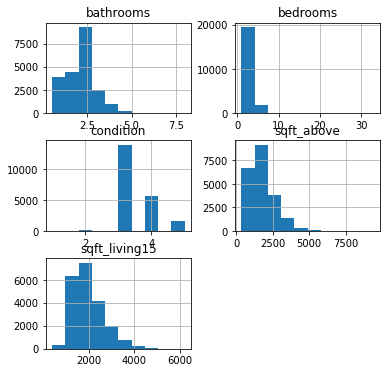

In [90]:
data_pred[["bedrooms", "bathrooms", "condition", "sqft_above", "sqft_living15"]].hist(figsize  = [6, 6]);

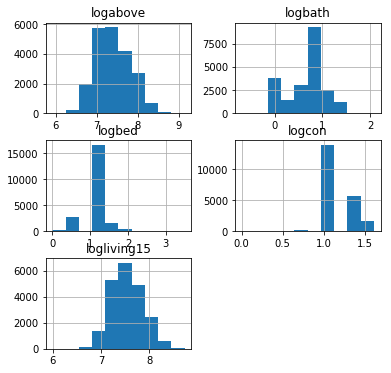

In [91]:
data_log = pd.DataFrame([])
data_log["logbed"] = np.log(data_pred["bedrooms"])
data_log["logbath"] = np.log(data_pred["bathrooms"])
data_log["logcon"] = np.log(data_pred["condition"])
data_log["logabove"] = np.log(data_pred["sqft_above"])
data_log["logliving15"] = np.log(data_pred["sqft_living15"])
data_log.hist(figsize  = [6, 6]);

In [132]:
logbed = np.log(multi_df["bedrooms"])
logbath = np.log(multi_df["bathrooms"])
logcon = np.log(multi_df["condition"])
logabove = np.log(multi_df["sqft_above"])
logliving15 = np.log(multi_df["sqft_living15"])

scaled_bed = (logbed-np.mean(logbed))/np.sqrt(np.var(logbed))
scaled_bath = (logbath-np.mean(logbath))/np.sqrt(np.var(logbath))
scaled_con = (logcon-np.mean(logcon))/np.sqrt(np.var(logcon))
scaled_above = (logabove-np.mean(logabove))/np.sqrt(np.var(logabove))
scaled_living15 = (logliving15-np.mean(logliving15))/np.sqrt(np.var(logliving15))

data_fin = pd.DataFrame([])
data_fin["bed"]= scaled_bed
data_fin["bath"]= scaled_bath
data_fin["con"] = scaled_con
data_fin["above"] = scaled_above
data_fin["living15"] = scaled_living15
zip_dummies2 = data.iloc[:,9:79]
price = multi_df["price"]
data_fin = pd.concat([price, data_fin, zip_dummies2], axis=1)

13.) Now I will begin OLS Regression on remaining fields

In [133]:
from statsmodels.formula.api import ols

In [134]:
outcome = 'price'
predictors = data_fin.drop('price', axis=1)
predictors = predictors.drop("zip_98199",axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [135]:
model = ols(formula = formula, data=data_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     517.3
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:45:53   Log-Likelihood:            -2.9400e+05
No. Observations:               21420   AIC:                         5.881e+05
Df Residuals:                   21346   BIC:                         5.887e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.44e+05   8534.893     63.743      0.000    5.27e+05    5.61e+05
bed        -1.714e+04   1935.725     -8.853      0.000   -2.09e+04   -1.33e+04
bath        3.664e+04   2216.882     16.526      0.000    3.23e+04     4.1e+04
con         2.921e+04   1590.459     18.366      0.000    2.61e+04    3.23e+04
above       1.346e+05   2641.010     50.950      0.000    1.29e+05     1.4e+05
living15    8.506e+04   2371.734     35.864      0.000    8.04e+04    8.97e+04
zip_98002  -2.026e+05    1.8e+04    -11.234      0.000   -2.38e+05   -1.67e+05
zip_98003  -2.254e+05   1.58e+04    -14.242      0.000   -2.56e+05   -1.94e+05
zip_98004   6.262e+05   1.52e+04     41.067      0.000    5.96e+05    6.56e+05
zip_98005   1.062e+05   1.92e+04      5.531      0.000    6.86e+04    1.44e+05
zip_98006   1.241e+05   1.33e+04      9.314      0.000     9.8e+04     1.5e+05
zip_98007   1.641e+04   2.07e+04      0.794      0.427   -2.41e+04    5.69e+04
zip_98008   8.933e+04   1.57e+04      5.682      0.000    5.85e+04     1.2e+05
zip_98010  -1.526e+05   2.39e+04     -6.397      0.000   -1.99e+05   -1.06e+05
zip_98011  -1.299e+05   1.81e+04     -7.188      0.000   -1.65e+05   -9.45e+04
zip_98014  -9.264e+04   2.18e+04     -4.257      0.000   -1.35e+05      -5e+04
zip_98019  -1.865e+05   1.82e+04    -10.231      0.000   -2.22e+05   -1.51e+05
zip_98022  -2.135e+05   1.69e+04    -12.655      0.000   -2.47e+05    -1.8e+05
zip_98023  -2.455e+05   1.31e+04    -18.686      0.000   -2.71e+05    -2.2e+05
zip_98024  -1.154e+04   2.64e+04     -0.438      0.662   -6.32e+04    4.01e+04
zip_98027   -4.55e+04   1.39e+04     -3.269      0.001   -7.28e+04   -1.82e+04
zip_98028  -1.088e+05   1.57e+04     -6.922      0.000    -1.4e+05    -7.8e+04
zip_98029  -4.849e+04   1.51e+04     -3.211      0.001   -7.81e+04   -1.89e+04
zip_98030  -2.615e+05   1.63e+04    -16.001      0.000   -2.93e+05   -2.29e+05
zip_98031  -2.455e+05   1.59e+04    -15.405      0.000   -2.77e+05   -2.14e+05
zip_98032  -1.877e+05   2.18e+04     -8.627      0.000    -2.3e+05   -1.45e+05
zip_98033   1.755e+05   1.37e+04     12.818      0.000    1.49e+05    2.02e+05
zip_98034  -1434.2399   1.28e+04     -0.112      0.911   -2.65e+04    2.36e+04
zip_98038   -2.59e+05   1.26e+04    -20.633      0.000   -2.84e+05   -2.34e+05
zip_98039   1.295e+06   3.29e+04     39.332      0.000    1.23e+06    1.36e+06
zip_98040   4.072e+05   1.59e+04     25.559      0.000    3.76e+05    4.38e+05
zip_98042  -2.521e+05   1.28e+04    -19.747      0.000   -2.77e+05   -2.27e+05
zip_98045  -1.136e+05   1.73e+04     -6.573      0.000   -1.48e+05   -7.97e+04
zip_98052  -7663.3592   1.27e+04     -0.606      0.545   -3.25e+04    1.71e+04
zip_98053  -4.275e+04   1.41e+04     -3.021      0.003   -7.05e+04    -1.5e+04
zip_98055   -1.79e+05   1.62e+04    -11.068      0.000   -2.11e+05   -1.47e+05
zi

13.) Now I will use Stepwise Regression to choose the best columns to add.

In [103]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [104]:
result = stepwise_selection(predictors, data_fin["price"], verbose = True)
print('resulting features:')
print(result)

Add  above                          with p-value 0.0
Add  living15                       with p-value 0.0
Add  zip_98004                      with p-value 0.0
Add  zip_98039                      with p-value 1.31973e-236
Add  zip_98112                      with p-value 5.91332e-190
Add  zip_98040                      with p-value 2.66172e-179
Add  zip_98038                      with p-value 1.35852e-90
Add  zip_98105                      with p-value 1.77166e-87
Add  zip_98042                      with p-value 2.0146e-85
Add  zip_98023                      with p-value 1.6243e-86
Add  zip_98092                      with p-value 5.38329e-87
Add  zip_98119                      with p-value 1.08893e-77
Add  zip_98115                      with p-value 6.74938e-70
Add  zip_98103                      with p-value 6.01528e-73
Add  zip_98117                      with p-value 8.65877e-81
Add  zip_98033                      with p-value 3.43088e-73
Add  bath                           with p-valu

14.) Now for the final OLS with columns suggested through stepwise regression

In [136]:
data_final = data_fin[['above', 'living15', 'zip_98004', 'zip_98039', 'zip_98112', 'zip_98040', 'zip_98038', 'zip_98105', 'zip_98042', 'zip_98023', 'zip_98092', 'zip_98119', 'zip_98115', 'zip_98103', 'zip_98117', 'zip_98033', 'bath', 'con', 'zip_98109', 'zip_98102', 'zip_98116', 'zip_98006', 'zip_98122', 'zip_98107', 'zip_98144', 'zip_98136', 'zip_98030', 'zip_98031', 'zip_98058', 'zip_98003', 'zip_98059', 'zip_98022', 'zip_98065', 'zip_98126', 'zip_98002', 'zip_98055', 'zip_98177', 'zip_98008', 'zip_98005', 'bed', 'zip_98019', 'zip_98198', 'zip_98056', 'zip_98032', 'zip_98125', 'zip_98118', 'zip_98011', 'zip_98188', 'zip_98028', 'zip_98010', 'zip_98045', 'zip_98168', 'zip_98178', 'zip_98148', 'zip_98077', 'zip_98072', 'zip_98014']].copy()

In [142]:
outcome = 'price'
predictors = data_final
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [143]:
model = ols(formula = formula, data=data_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     661.0
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:53:57   Log-Likelihood:            -2.9402e+05
No. Observations:               21420   AIC:                         5.881e+05
Df Residuals:                   21362   BIC:                         5.886e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.222e+05   2864.567    182.314      0.000    5.17e+05    5.28e+05
above       1.331e+05   2611.098     50.977      0.000    1.28e+05    1.38e+05
living15    8.416e+04   2308.537     36.457      0.000    7.96e+04    8.87e+04
zip_98004   6.493e+05   1.29e+04     50.298      0.000    6.24e+05    6.75e+05
zip_98039   1.319e+06   3.19e+04     41.365      0.000    1.26e+06    1.38e+06
zip_98112   4.925e+05   1.39e+04     35.547      0.000    4.65e+05     5.2e+05
zip_98040   4.306e+05   1.37e+04     31.420      0.000    4.04e+05    4.57e+05
zip_98038  -2.365e+05   9615.098    -24.599      0.000   -2.55e+05   -2.18e+05
zip_98105   3.394e+05   1.49e+04     22.712      0.000     3.1e+05    3.69e+05
zip_98042  -2.303e+05   9918.915    -23.215      0.000    -2.5e+05   -2.11e+05
zip_98023  -2.239e+05   1.04e+04    -21.529      0.000   -2.44e+05   -2.04e+05
zip_98092  -2.672e+05   1.22e+04    -21.935      0.000   -2.91e+05   -2.43e+05
zip_98119   3.615e+05   1.66e+04     21.773      0.000    3.29e+05    3.94e+05
zip_98115   2.006e+05   9720.169     20.639      0.000    1.82e+05     2.2e+05
zip_98103   1.845e+05   9592.080     19.235      0.000    1.66e+05    2.03e+05
zip_98117   1.965e+05   9990.279     19.671      0.000    1.77e+05    2.16e+05
zip_98033   1.979e+05   1.11e+04     17.877      0.000    1.76e+05     2.2e+05
bath        3.666e+04   2205.867     16.619      0.000    3.23e+04     4.1e+04
con         2.927e+04   1582.674     18.496      0.000    2.62e+04    3.24e+04
zip_98109   3.773e+05   2.14e+04     17.609      0.000    3.35e+05    4.19e+05
zip_98102   3.833e+05   2.19e+04     17.478      0.000     3.4e+05    4.26e+05
zip_98116   1.946e+05   1.26e+04     15.447      0.000     1.7e+05    2.19e+05
zip_98006   1.472e+05   1.06e+04     13.910      0.000    1.26e+05    1.68e+05
zip_98122   1.954e+05   1.34e+04     14.597      0.000    1.69e+05    2.22e+05
zip_98107    1.93e+05    1.4e+04     13.759      0.000    1.66e+05    2.21e+05
zip_98144   1.569e+05   1.24e+04     12.659      0.000    1.33e+05    1.81e+05
zip_98136   1.548e+05    1.4e+04     11.045      0.000    1.27e+05    1.82e+05
zip_98030  -2.397e+05   1.42e+04    -16.844      0.000   -2.68e+05   -2.12e+05
zip_98031   -2.24e+05   1.38e+04    -16.259      0.000   -2.51e+05   -1.97e+05
zip_98058   -1.82e+05   1.08e+04    -16.805      0.000   -2.03e+05   -1.61e+05
zip_98003  -2.039e+05   1.36e+04    -14.941      0.000   -2.31e+05   -1.77e+05
zip_98059  -1.554e+05   1.07e+04    -14.515      0.000   -1.76e+05   -1.34e+05
zip_98022  -1.918e+05   1.48e+04    -12.921      0.000   -2.21e+05   -1.63e+05
zip_98065  -1.684e+05   1.31e+04    -12.870      0.000   -1.94e+05   -1.43e+05
zip_98126   1.016e+05   1.23e+04      8.262      0.000    7.75e+04    1.26e+05
zip_98002  -1.819e+05   1.62e+04    -11.257      0.000   -2.14e+05    -1.5e+05
zi

15.) Now that I have my final analysis I will take a look at some regression analysis.

Housing DataSet - Regression Analysis and Diagnostics for formula: price~above
-------------------------------------------------------------------------------------


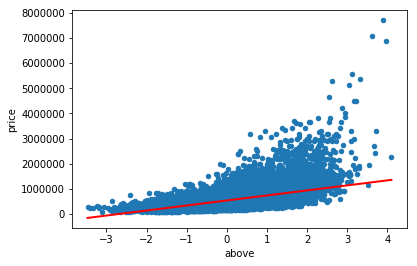

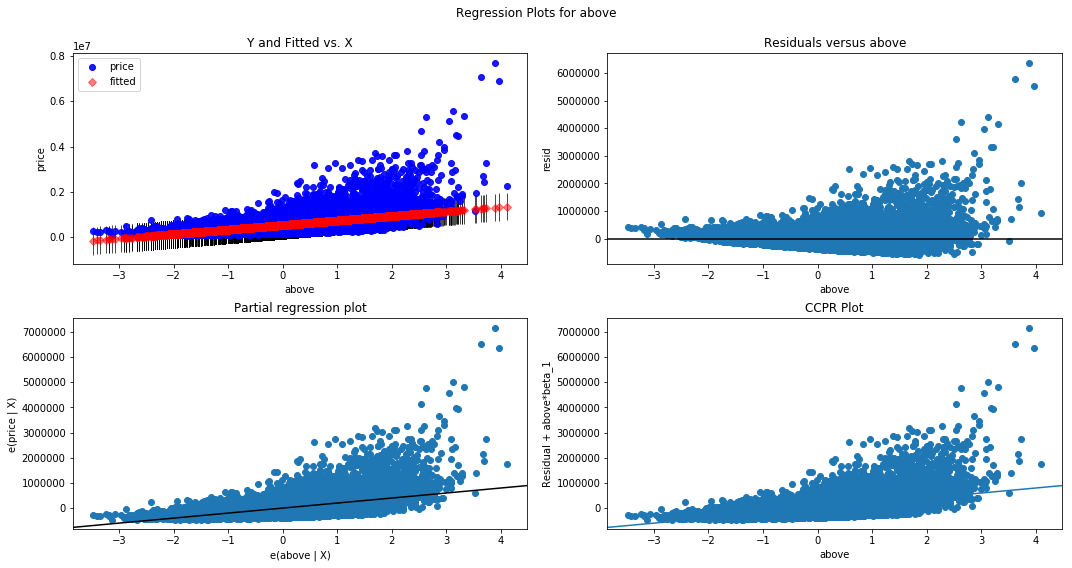

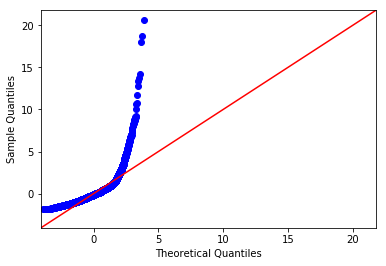

Housing DataSet - Regression Analysis and Diagnostics for formula: price~living15
-------------------------------------------------------------------------------------


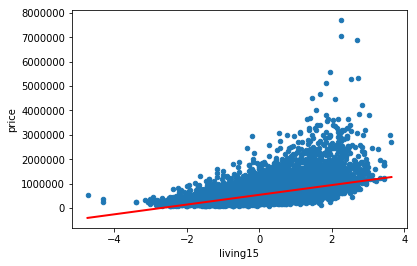

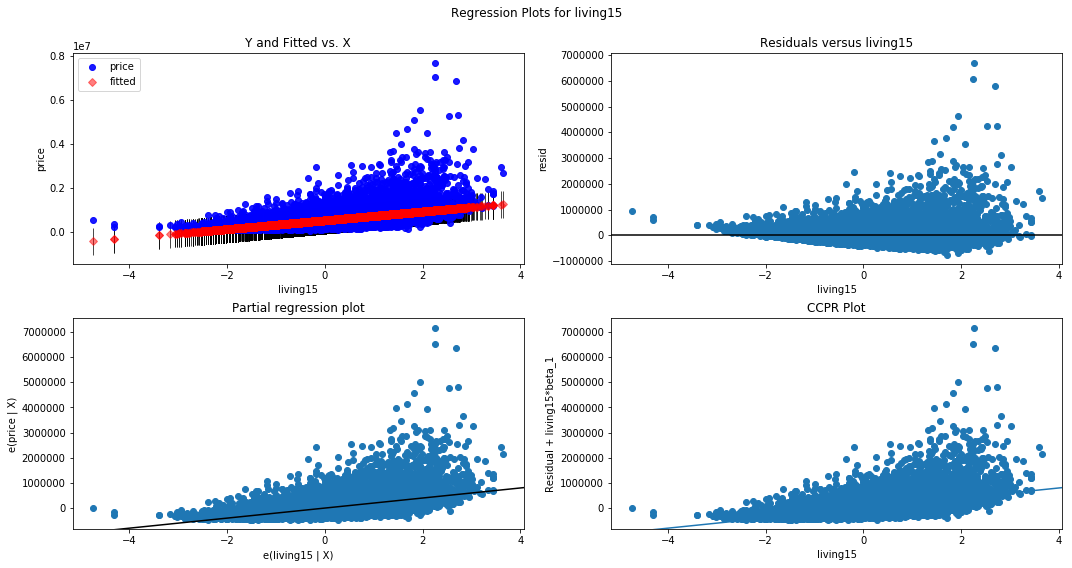

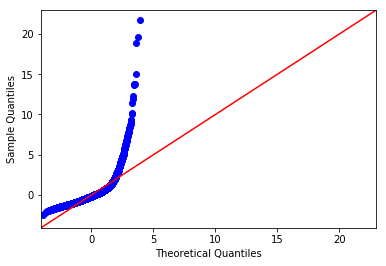

Housing DataSet - Regression Analysis and Diagnostics for formula: price~bath
-------------------------------------------------------------------------------------


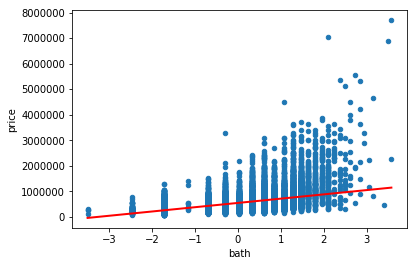

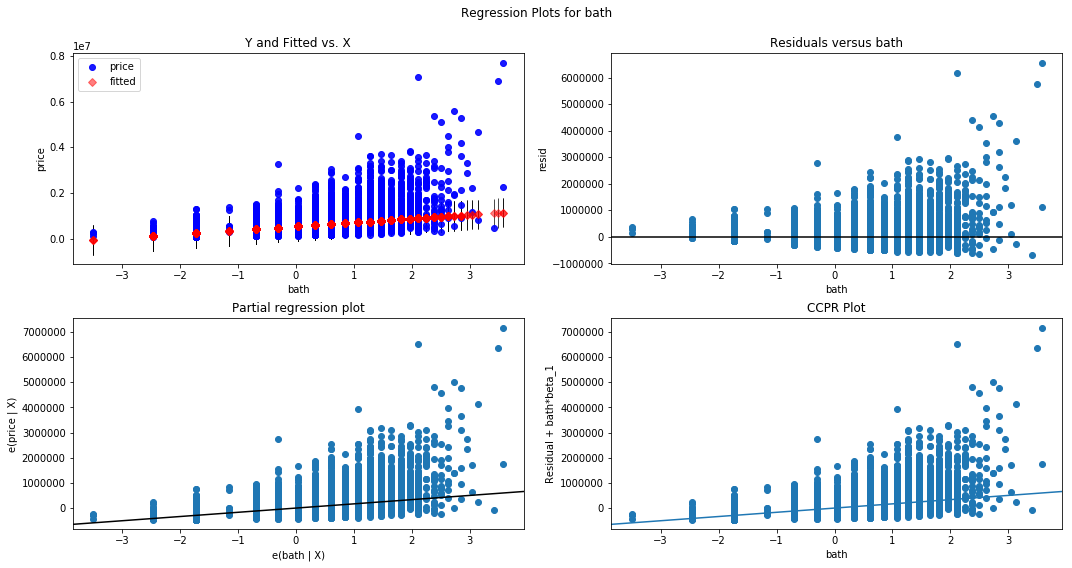

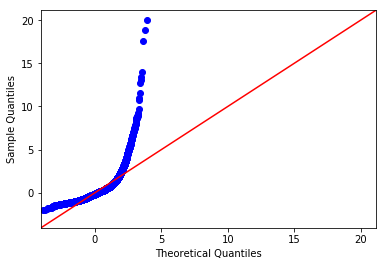

Housing DataSet - Regression Analysis and Diagnostics for formula: price~con
-------------------------------------------------------------------------------------


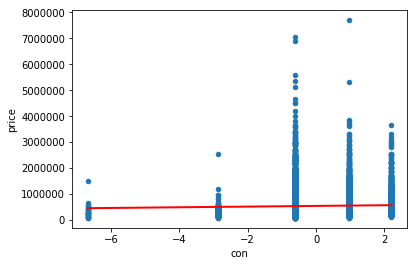

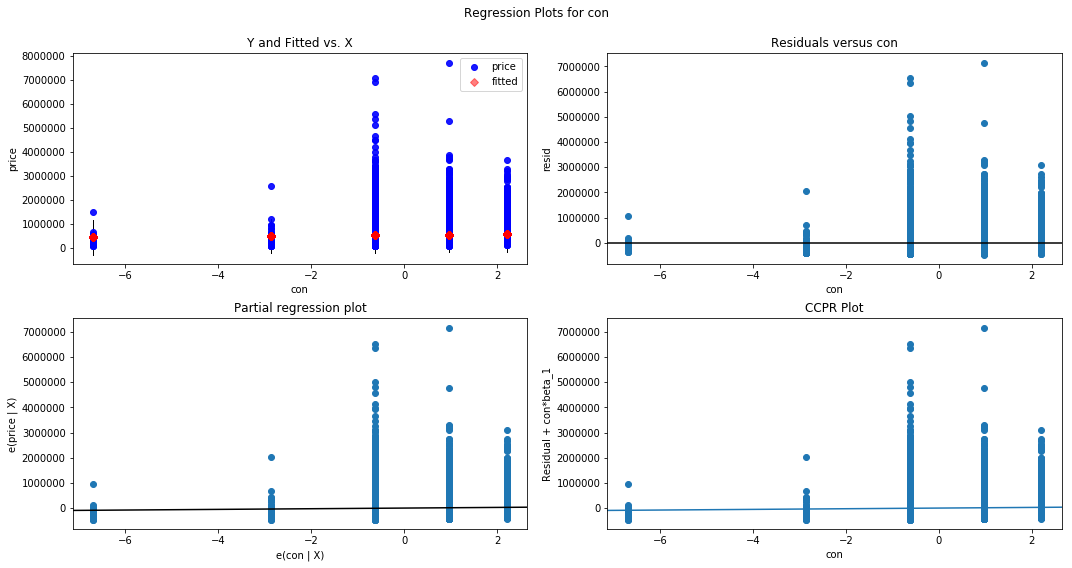

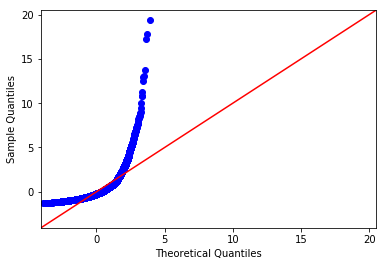

Housing DataSet - Regression Analysis and Diagnostics for formula: price~bed
-------------------------------------------------------------------------------------


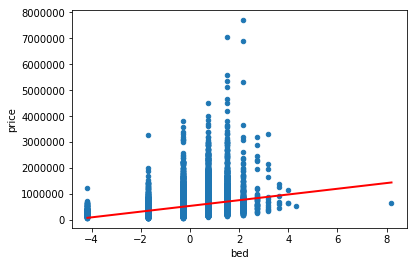

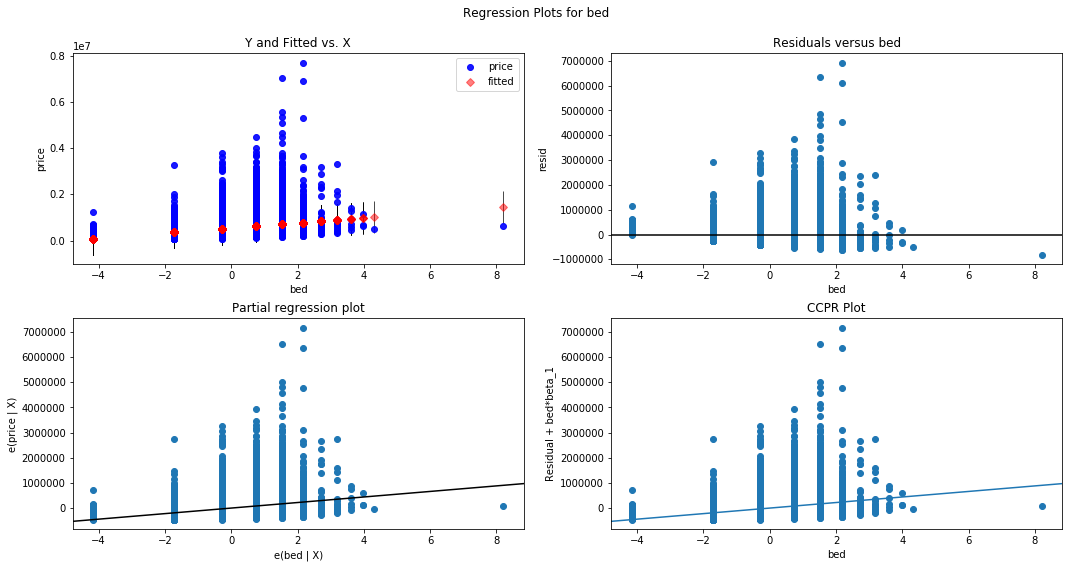

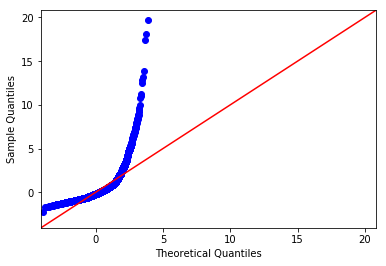

In [148]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms



results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['above', 'living15', 'bath', 'con', 'bed']):
    print ("Housing DataSet - Regression Analysis and Diagnostics for formula: price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val  
    model = smf.ols(formula=f, data=data_fin).fit()
    
    X_new = pd.DataFrame({val: [data_fin[val].min(), data_fin[val].max()]});
    preds = model.predict(X_new)
    data_fin.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])

In [180]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,above,0.294306,540739,199598,0,1.38313e+06
2,living15,0.295098,540739,199866,0,1.89885e+06
3,bath,0.208114,540739,167845,0,1.27762e+06
4,con,0.00125946,540739,13057.1,2.04364e-07,1.12936e+06
5,bed,0.089726,540739,110209,0,1.2035e+06


Ok now that I have all of my regression analysis on my non zip code columns, I will begin cross validation as my final step.

In [159]:
data_fin.head()

,price,bed,bath,con,above,living15,zip_98002,zip_98003,zip_98004,zip_98005,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,-0.281396,-1.732187,-0.616323,-0.756754,-1.038314,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,-0.281396,0.336429,-0.616323,0.669204,-0.329592,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-1.715761,-1.732187,-0.616323,-1.755931,1.123848,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.736302,1.070282,2.206853,-1.029965,-0.993068,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.281396,0.035974,-0.616323,0.070152,-0.137008,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
X = data_fin.drop(['price'], axis=1)
y = data_fin[['price']]

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [170]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)
y_hat_train = linreg.predict(X_train)

In [172]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [173]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 45336513948.13085
Test Mean Squarred Error: 53244315653.16054


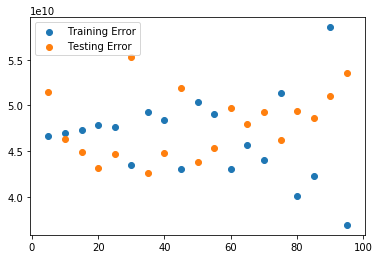

In [174]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

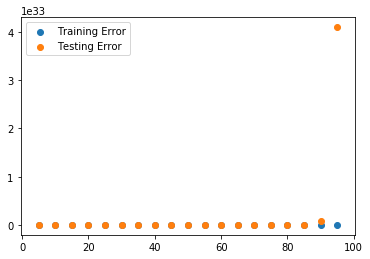

In [175]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [176]:
def kfolds(data, k):
    #Force data as pandas dataframe
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [177]:
my_data = pd.concat([X.reset_index(drop=True), y], axis=1)

In [178]:
my_folds = kfolds(my_data, 5)

In [179]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(my_folds) if i!=n])
    test = my_folds[n]
    # Fit a linear regression model
    linreg.fit(train[X.columns], train[y.columns])
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(train[X.columns])
    y_hat_test = linreg.predict(test[X.columns])
    train_residuals = y_hat_train - train[y.columns]
    test_residuals = y_hat_test - test[y.columns]
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[price    4.402329e+10
dtype: float64, price    4.518984e+10
dtype: float64, price    4.873215e+10
dtype: float64, price    4.899870e+10
dtype: float64, price    4.705336e+10
dtype: float64]
[price    5.847043e+10
dtype: float64, price    5.389784e+10
dtype: float64, price    3.965527e+10
dtype: float64, price    3.858774e+10
dtype: float64, price    4.665075e+10
dtype: float64]
